In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display

columns=['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','date_time','traffic_volume']
df = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv' )


In [205]:
print (f"rows {df.shape[0]} - columns {df.shape[1]} .")

rows 48204 - columns 9 .


In [206]:

df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [207]:

print("missing values per column:")
print(df.isnull().sum())

missing values per column:
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [208]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [209]:
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [210]:

print(df.columns.tolist())

print(df.describe().T)


['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']
                  count         mean          std  min      25%      50%  \
temp            48204.0   281.205870    13.338232  0.0   272.16   282.45   
rain_1h         48204.0     0.334264    44.789133  0.0     0.00     0.00   
snow_1h         48204.0     0.000222     0.008168  0.0     0.00     0.00   
clouds_all      48204.0    49.362231    39.015750  0.0     1.00    64.00   
traffic_volume  48204.0  3259.818355  1986.860670  0.0  1193.00  3380.00   

                     75%      max  
temp             291.806   310.07  
rain_1h            0.000  9831.30  
snow_1h            0.000     0.51  
clouds_all        90.000   100.00  
traffic_volume  4933.000  7280.00  


In [211]:
categorical_cols = ['holiday', 'weather_main', 'weather_description', 'date_time']
for col in categorical_cols:
    print(f"----column: {col}")
    print(df[col].value_counts().head(10))

numeric_cols=df.select_dtypes(include=['float64', 'int64']).columns   
for col in numeric_cols:
    print(f"------column: {col}")
    print(df[col].describe())
    print(df[col].isnull().sum())
    print(df[col].nunique())


----column: holiday
holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Name: count, dtype: int64
----column: weather_main
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Name: count, dtype: int64
----column: weather_description
weather_description
sky is clear        11665
mist                 5950
overcast clouds      5081
broken clouds        4666
scattered clouds     3461
light rain           3372
few clouds           1956
light snow           1946
Sky is Clear         1726
moderate rain        1664
Name: count, dtype: int64
----column: da

In [212]:

df['date_time']=pd.to_datetime(df['date_time'])    

df['hour']=df['date_time'].dt.hour
df['weekday']=df['date_time'].dt.weekday
df['month']=df['date_time'].dt.month

def month_to_season(month):
    if month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'
    else:
        return 'winter'

df['season']=df['month'].apply(month_to_season) 


,temp
0,15.13
1,16.21
2,16.43
3,16.98
4,17.99


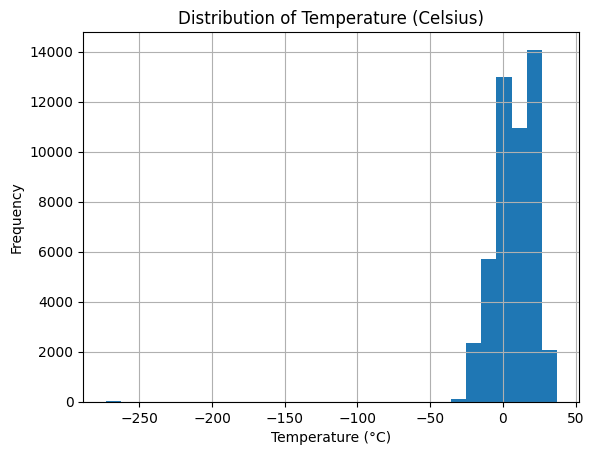

In [213]:

df['temp']=df['temp']- 273.15


 
display(df[['temp']].head())

df['temp'].hist(bins=30)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature (Celsius)')
plt.show()

df[df['temp'] < -25].shape

df = df[df['temp'] >= -25]


df = df.drop(['date_time', 'temp'], axis=1)

In [214]:
categorical_cols = ['holiday', 'weather_main', 'weather_description', 'season']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

,rain_1h,snow_1h,clouds_all,traffic_volume,hour,weekday,month,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,...,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,season_spring,season_summer,season_winter
0,0.0,0.0,40,5545,9,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,75,4516,10,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,90,4767,11,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,90,5026,12,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,75,4918,13,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False


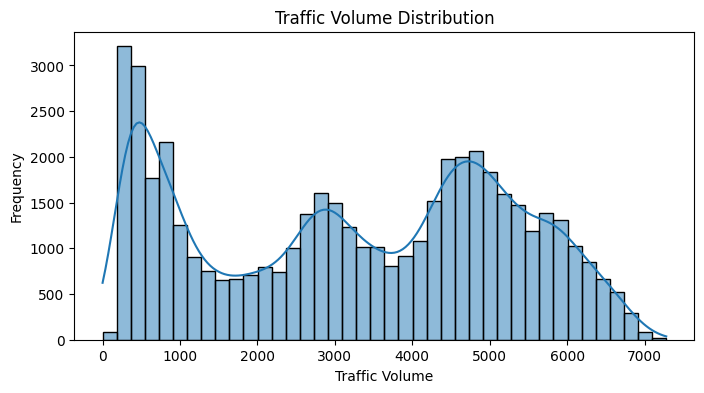

In [215]:
plt.figure(figsize=(8,4)) 
sns.histplot(df['traffic_volume'], bins=40, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

In [216]:
df = df[(df['traffic_volume'] > 50) & (df['traffic_volume'] < 7000)]
df.head() 


,rain_1h,snow_1h,clouds_all,traffic_volume,hour,weekday,month,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,...,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,season_spring,season_summer,season_winter
0,0.0,0.0,40,5545,9,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,75,4516,10,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,90,4767,11,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,90,5026,12,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,75,4918,13,1,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

X = df.drop(['traffic_volume'], axis=1)
y = df['traffic_volume']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
 

MAE: 1581.37
RMSE: 1800.39
R2 score: 0.16


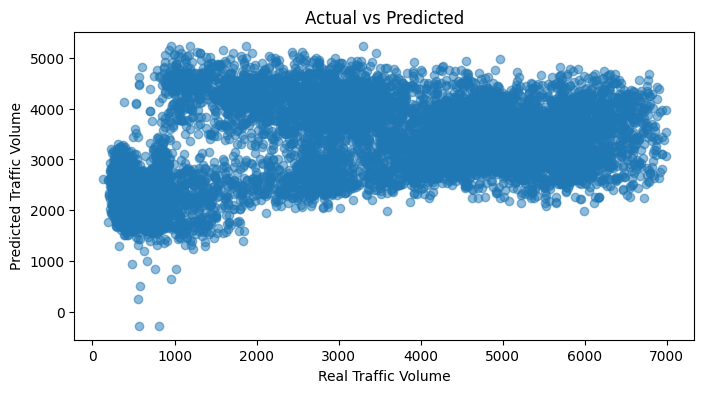

hour                                    662.287177
clouds_all                              190.767791
weather_description_scattered clouds     86.907853
weather_description_few clouds           64.123871
weather_description_Sky is Clear         50.991628
                                           ...    
weather_description_mist                -38.549573
weather_description_snow                -50.397544
weather_description_overcast clouds     -69.456893
season_winter                           -98.006607
weekday                                -287.318990
Length: 66, dtype: float64


In [218]:

plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted")
plt.show()

coefs = pd.Series(lr.coef_, index=X.columns)
print(coefs.sort_values(ascending=False))